In [10]:
pip install numpy pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


<h1> 1.A "Exploración de datos" </h1>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
df = pd.read_csv("C:/Users/walte/Documents/Proyecto final/train.csv")

In [12]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [13]:
df.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

<h2> 1. Nivel General de Satisfacción de los Pasajeros </h2>

satisfaction
neutral or dissatisfied    56.666731
satisfied                  43.333269
Name: proportion, dtype: float64


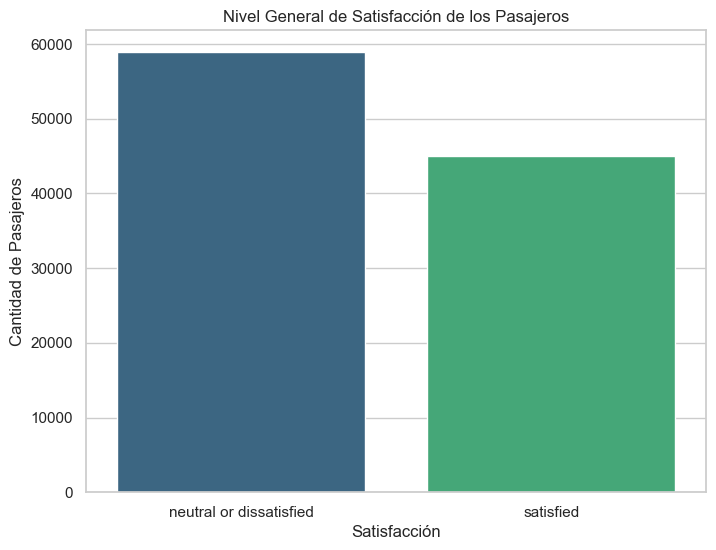

In [15]:
satisfaction_counts = df['satisfaction'].value_counts(normalize=True) * 100
print(satisfaction_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='satisfaction', data=df, palette='viridis')
plt.title('Nivel General de Satisfacción de los Pasajeros')
plt.ylabel('Cantidad de Pasajeros')
plt.xlabel('Satisfacción')
plt.show()

<h4>Podemos denotar con el grafico y los datos retornados que el nivel de satisfacción solamente alcanza el 43% lo cual es algo alarmante ya que que los clientes se encuentren insatisfechos o neutrales con la AéroLinea puede denotar una falta de lealtad a futuro lo que conllevaría que nuestros clientes cambien de AéroLineas con el pasar del tiempo</h4>

<h2> 2. Satisfacción Según el Género </h2>

satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                      57.262882  42.737118
Male                        56.052524  43.947476


<Figure size 1000x600 with 0 Axes>

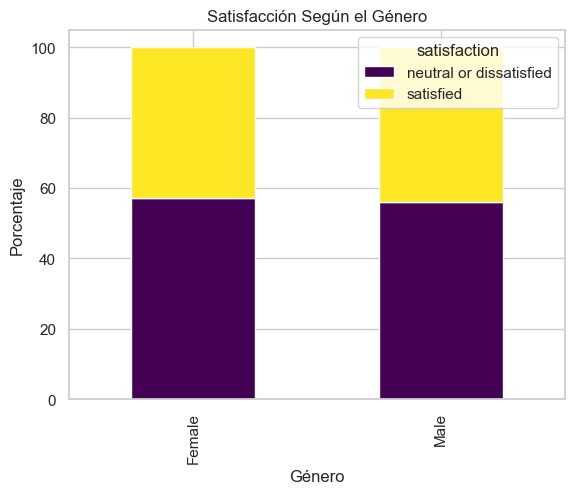

In [16]:
satisfaction_by_gender = df.groupby('Gender')['satisfaction'].value_counts(normalize=True).unstack() * 100
print(satisfaction_by_gender)

plt.figure(figsize=(10, 6))
satisfaction_by_gender.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Satisfacción Según el Género')
plt.ylabel('Porcentaje')
plt.xlabel('Género')
plt.show()

<h4>Con los datos devueltos por el query y por el grafico en sí que practicamente no hay distinción entre sexos en los niveles de satisfacción la variación es redondeando de ± 1%. Teniendo en resumen que quienes perciben una menor satisfacción son las mujeres.</h4>

<h2> 3. Satisfacción Según el Grupo de Edad </h2>

satisfaction  neutral or dissatisfied  satisfied
Age Group                                       
<18                         82.725334  17.274666
18-30                       64.588225  35.411775
31-45                       51.272104  48.727896
46-60                       42.591664  57.408336
>60                         79.162487  20.837513


C:\Users\walte\AppData\Local\Temp\ipykernel_11900\412822293.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  satisfaction_by_age_group = df.groupby('Age Group')['satisfaction'].value_counts(normalize=True).unstack() * 100


<Figure size 1200x800 with 0 Axes>

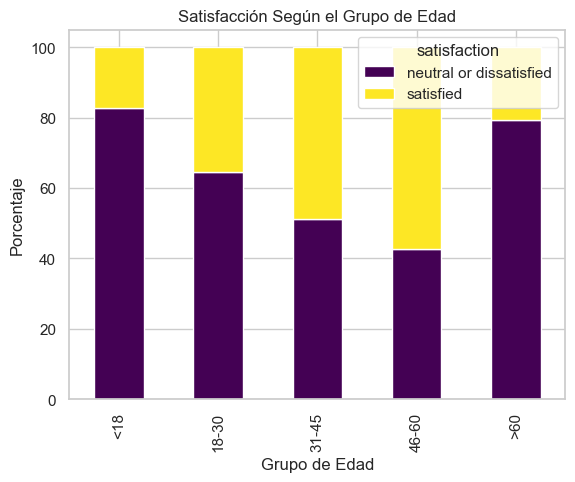

In [17]:
bins = [0, 18, 30, 45, 60, 100]
labels = ['<18', '18-30', '31-45', '46-60', '>60']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

satisfaction_by_age_group = df.groupby('Age Group')['satisfaction'].value_counts(normalize=True).unstack() * 100
print(satisfaction_by_age_group)

plt.figure(figsize=(12, 8))
satisfaction_by_age_group.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Satisfacción Según el Grupo de Edad')
plt.ylabel('Porcentaje')
plt.xlabel('Grupo de Edad')
plt.show()

<h4>Podemos denotar una evidente brecha entre edades, teniendo que engenerea a medida que pasan los años, las personas van volviendosé menos críticas por decirlo de alguna manera, ya que como observamos en los porcentajes el grupo de edad con menor grado de satisfacción es de los menores de 18 con un aproximado de 17% de satisfacción, siguiendo con el grupo de 18-30 años un aproximado del 36%, de satisfacción 31-45 años un aproximado del 49% de satisfacción, el unico grupo con un nivel de satisfación mayor al 50% sería el grupo de 46-60 años que poseen un 57% de satisfacción y por ultimo las personás con má de 60 años, vuelven a ser unos de los más críticos, con un promedio de 1% de grado de satisfacción, aún así podemos denotar que nuestro grupo "menos crítico" (por llamarlo de alguna manera) que serían las personas que se encuentran en un rando de 46-60 años es uno de los que más personas poseé debido a que por más de que tengamos 4 grupos con críticas bastante malas, el porcentaje de satisfacción general se mantiene 57% Negativo - 43% positivo</h4>

<h2>4. Satisfacción Entre Clientes Leales y No Leales</h2>

satisfaction       neutral or dissatisfied  satisfied
Customer Type                                        
Loyal Customer                   52.270881  47.729119
disloyal Customer                76.334229  23.665771


<Figure size 1000x600 with 0 Axes>

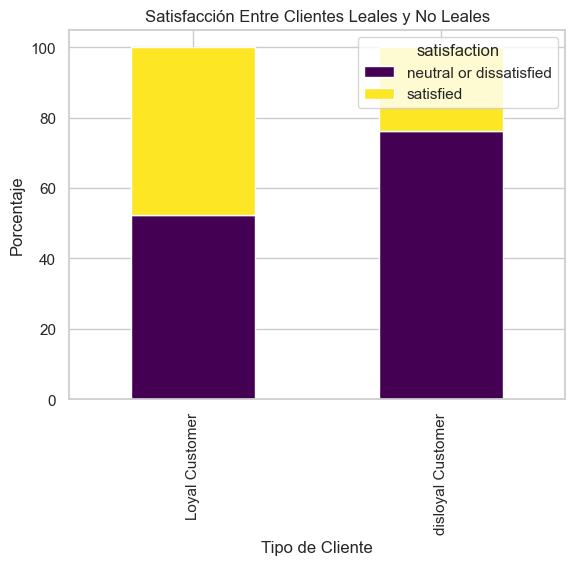

In [18]:
satisfaction_by_customer_type = df.groupby('Customer Type')['satisfaction'].value_counts(normalize=True).unstack() * 100
print(satisfaction_by_customer_type)

plt.figure(figsize=(10, 6))
satisfaction_by_customer_type.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Satisfacción Entre Clientes Leales y No Leales')
plt.ylabel('Porcentaje')
plt.xlabel('Tipo de Cliente')
plt.show()

<h4>Podemos denotar que nuestros clientes "Leales" poseen un mayor porcentaje de satisfacción (aún así es un procentaje inferior al 50% así que no es algo muy significativo) siendo así que nuestro nivel de satisfacción prácticamente se duplica de "leal" a "desleal" teniendo un salto de 24% a 48% de nivel de satisfacción</h4>

<h2> 5. Satisfacción Según el Tipo de Viaje </h2>

satisfaction     neutral or dissatisfied  satisfied
Type of Travel                                     
Business travel                41.740283  58.259717
Personal Travel                89.832243  10.167757


<Figure size 1000x600 with 0 Axes>

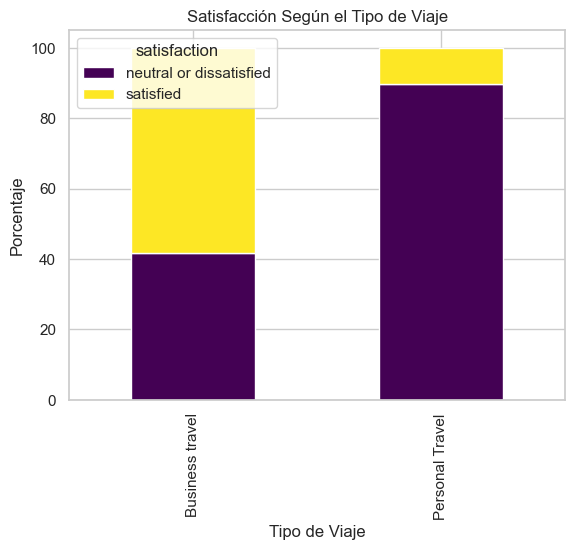

In [19]:
satisfaction_by_travel_type = df.groupby('Type of Travel')['satisfaction'].value_counts(normalize=True).unstack() * 100
print(satisfaction_by_travel_type)

plt.figure(figsize=(10, 6))
satisfaction_by_travel_type.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Satisfacción Según el Tipo de Viaje')
plt.ylabel('Porcentaje')
plt.xlabel('Tipo de Viaje')
plt.show()

<h4> Podemos observar que los pasajeros que viajan por negocios tienen una mayor satisfacción (58%) en comparación con aquellos que viajan por motivos personales (10%). Este resultado es significativo y sugiere que los viajes de negocios están mejor atendidos en términos de servicios y expectativas, mientras que los viajes personales parecen ser una área de oportunidad para la aerolínea. </h4>

<h2>6. Servicios que Influyen en la Satisfacción General</h2>

Inflight wifi service     0.410875
Inflight entertainment    0.002171
Seat comfort             -0.060936
Food and drink           -0.021221
Online boarding           0.162954
Gate location             0.000246
Leg room service         -0.092238
Baggage handling         -0.053344
Checkin service          -0.001055
Inflight service         -0.238069
Cleanliness               0.008932
Name: satisfaction, dtype: float64


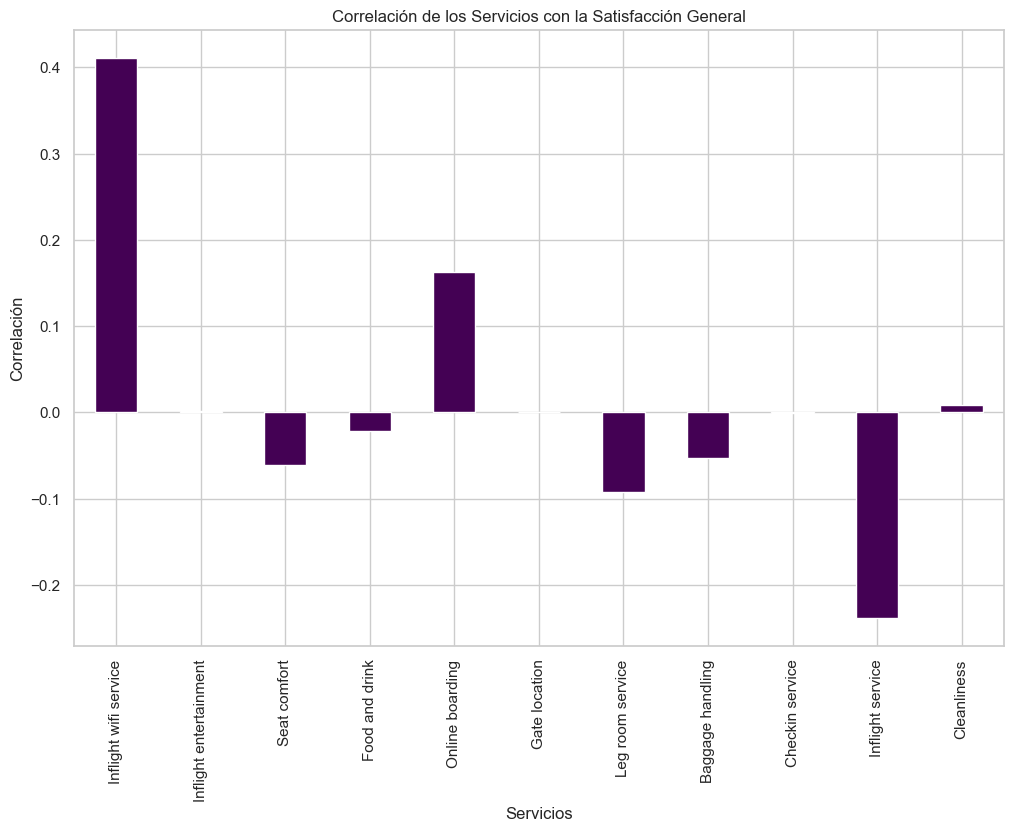

In [20]:
services = ['Inflight wifi service', 'Inflight entertainment', 'Seat comfort', 'Food and drink', 
            'Online boarding', 'Gate location', 'Leg room service', 'Baggage handling', 
            'Checkin service', 'Inflight service', 'Cleanliness']

# Calcular la correlación de cada servicio con la satisfacción
correlations = df[services + ['satisfaction']].apply(lambda x: x.factorize()[0]).corr()['satisfaction'].drop('satisfaction')
print(correlations)

# Visualización
plt.figure(figsize=(12, 8))
correlations.plot(kind='bar', colormap='viridis')
plt.title('Correlación de los Servicios con la Satisfacción General')
plt.ylabel('Correlación')
plt.xlabel('Servicios')
plt.show()

<h4>Los servicios con correlación positiva con la satisfacción incluyen el servicio de wifi a bordo, el embarque en línea y la limpieza. Sin embargo, algunos servicios como la comodidad del asiento, el servicio de sala de espera y el manejo de equipaje tienen una correlación negativa, lo que indica que estos aspectos pueden estar contribuyendo a la insatisfacción.</h4>

<h2>7. Servicios que Satisfacen Más y Menos a la Clase de Negocios </h2>

                         Inflight wifi service  Inflight entertainment  \
satisfaction                                                             
neutral or dissatisfied               2.390846                2.682121   
satisfied                             2.944635                4.055278   

                         Seat comfort  Food and drink  Online boarding  \
satisfaction                                                             
neutral or dissatisfied      2.989134        2.878828         2.774053   
satisfied                    4.100725        3.518852         4.131613   

                         Gate location  Leg room service  Baggage handling  \
satisfaction                                                                 
neutral or dissatisfied       2.978005          2.853540          3.200132   
satisfied                     2.985093          3.992836          4.125986   

                         Checkin service  Inflight service  Cleanliness  
satisfaction       

<Figure size 1400x800 with 0 Axes>

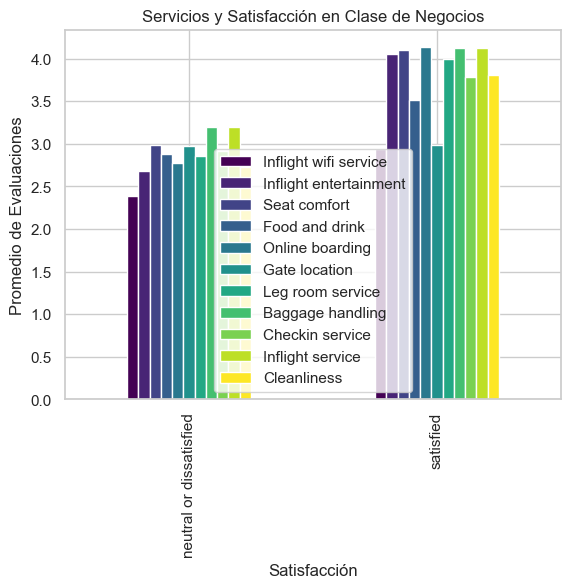

In [21]:
business_class = df[df['Class'] == 'Business']

satisfaction_by_service_business = business_class.groupby('satisfaction')[services].mean()
print(satisfaction_by_service_business)

plt.figure(figsize=(14, 8))
satisfaction_by_service_business.plot(kind='bar', colormap='viridis')
plt.title('Servicios y Satisfacción en Clase de Negocios')
plt.ylabel('Promedio de Evaluaciones')
plt.xlabel('Satisfacción')
plt.show()

<h4>Los pasajeros de la clase de negocios están más satisfechos con el entretenimiento a bordo y el confort del asiento, mientras que el servicio de wifi a bordo y la limpieza también son altamente valorados. Los aspectos que dejan más insatisfechos a estos pasajeros incluyen el servicio de comida y el manejo de equipaje.</h4>

<h2> 8. Impacto del Retraso en la Salida y Llegada en la Satisfacción</h2>

Correlación con el retraso en la salida: -0.0497860893257365
Correlación con el retraso en la llegada: -0.06176114084263811


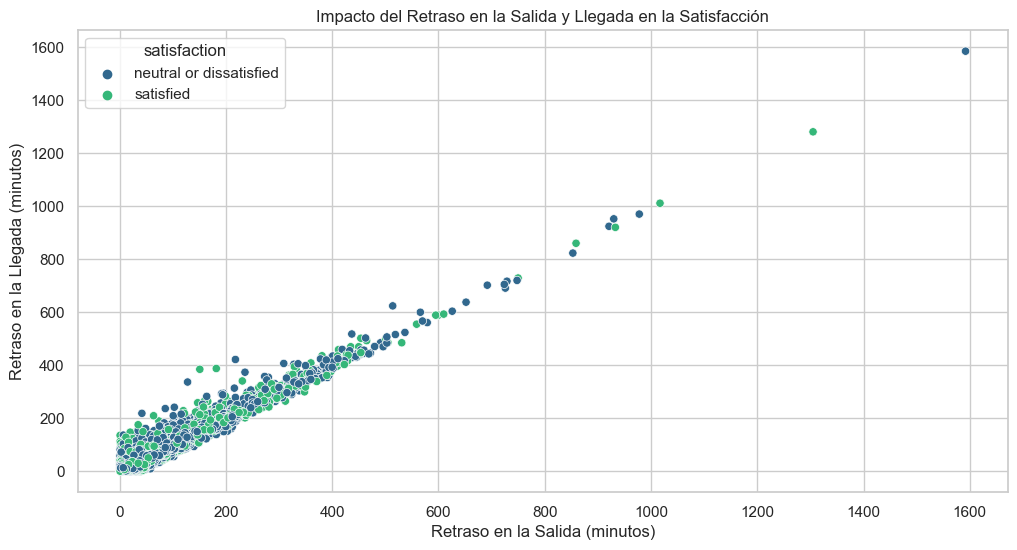

In [22]:
df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].replace(0, np.nan)
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].replace(0, np.nan)

# Calcular la correlación
correlation_departure_delay = df[['Departure Delay in Minutes', 'satisfaction']].apply(lambda x: x.factorize()[0]).corr()['satisfaction'].iloc[0]
correlation_arrival_delay = df[['Arrival Delay in Minutes', 'satisfaction']].apply(lambda x: x.factorize()[0]).corr()['satisfaction'].iloc[0]

print(f'Correlación con el retraso en la salida: {correlation_departure_delay}')
print(f'Correlación con el retraso en la llegada: {correlation_arrival_delay}')

# Visualización
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Departure Delay in Minutes', y='Arrival Delay in Minutes', hue='satisfaction', data=df, palette='viridis')
plt.title('Impacto del Retraso en la Salida y Llegada en la Satisfacción')
plt.xlabel('Retraso en la Salida (minutos)')
plt.ylabel('Retraso en la Llegada (minutos)')
plt.show()

<h4>La correlación negativa con el retraso en la salida (-0.049) y el retraso en la llegada (-0.062) indica que hay una ligera tendencia a que los retrasos disminuyan la satisfacción de los pasajeros, aunque la correlación no es muy fuerte.</h4>

<h2>9. Correlaciones Entre Niveles de Satisfacción </h2>

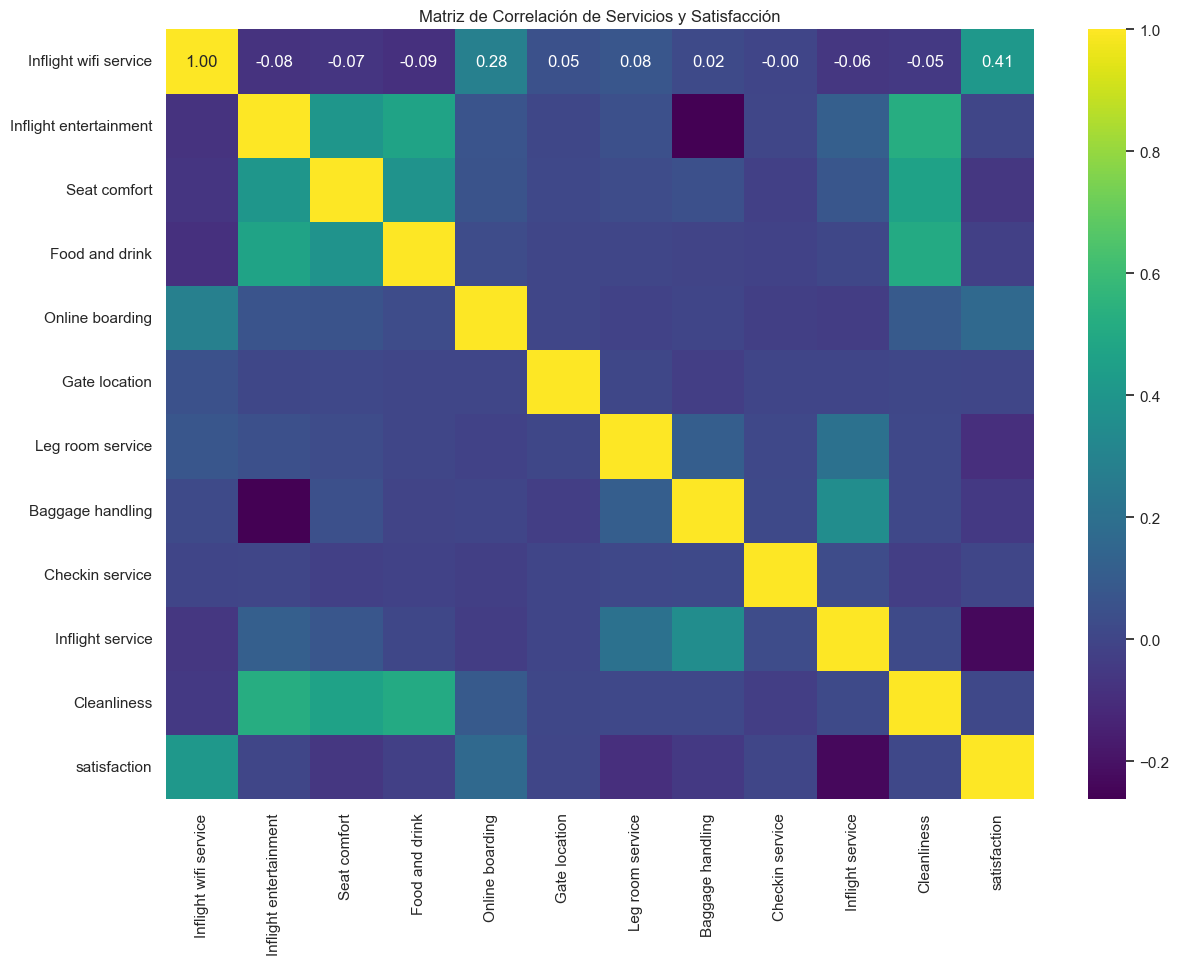

In [23]:
correlation_matrix = df[services + ['satisfaction']].apply(lambda x: x.factorize()[0]).corr()

# Visualización
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Matriz de Correlación de Servicios y Satisfacción')
plt.show()

<h4>La matriz de correlación muestra cómo los diferentes servicios a bordo se relacionan entre sí y con la satisfacción general. De la matriz, podemos hacer varias observaciones importantes:

    Inflight wifi service tiene una correlación positiva moderada con la satisfacción general (0.41).
    Online boarding también muestra una correlación positiva, aunque más baja (0.16).
    Inflight entertainment tiene una correlación muy baja con la satisfacción (0.002).
    Servicios como Seat comfort, Leg room service, Baggage handling, y Inflight service tienen correlaciones negativas con la satisfacción general, lo cual sugiere que estos servicios son áreas que necesitan mejoras.

Estas correlaciones indican que mejorar la calidad del wifi a bordo y el proceso de embarque en línea podría tener un impacto positivo significativo en la satisfacción de los pasajeros. En contraste, la comodidad del asiento, el manejo del equipaje y el servicio a bordo parecen ser áreas que están contribuyendo negativamente a la experiencia del cliente y deberían ser priorizadas para mejoras.</h4>

<h2>10. Segmentos de Clientes Basados en Demografía, Tipo de Cliente, Tipo de Viaje y Clase </h2>

satisfaction                                       neutral or dissatisfied  \
Gender Customer Type     Type of Travel  Class                               
Female Loyal Customer    Business travel Business                22.192847   
                                         Eco                     52.701562   
                                         Eco Plus                53.367543   
                         Personal Travel Business                87.827715   
                                         Eco                     89.731569   
                                         Eco Plus                91.323449   
       disloyal Customer Business travel Business                60.867280   
                                         Eco                     86.676981   
                                         Eco Plus                91.992883   
                         Personal Travel Business               100.000000   
                                         Eco                    

<Figure size 1600x1000 with 0 Axes>

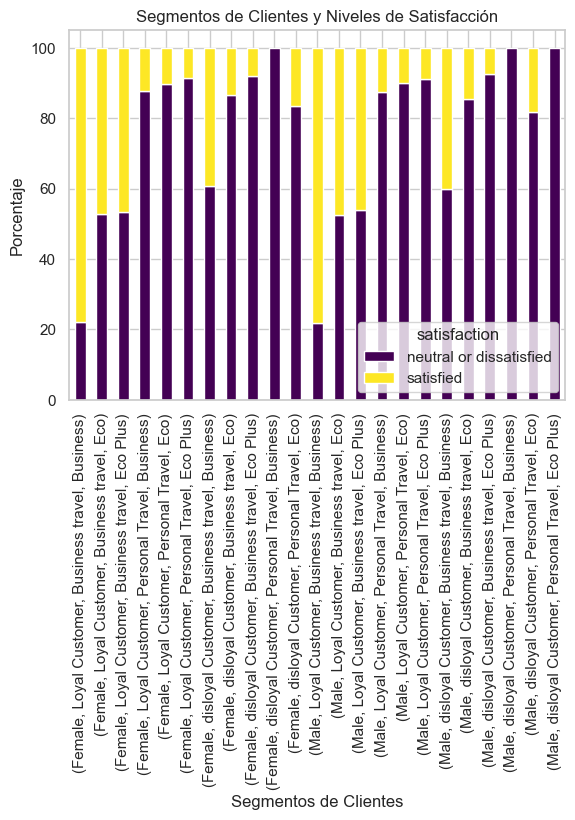

In [24]:
segments = df.groupby(['Gender', 'Customer Type', 'Type of Travel', 'Class'])['satisfaction'].value_counts(normalize=True).unstack() * 100
print(segments)

# Visualización
plt.figure(figsize=(16, 10))
segments.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Segmentos de Clientes y Niveles de Satisfacción')
plt.ylabel('Porcentaje')
plt.xlabel('Segmentos de Clientes')
plt.show()

<h4>Este análisis muestra que los clientes leales en viajes de negocios y en clase Business tienen los mayores niveles de satisfacción. En contraste, los clientes desleales y aquellos en clase Economy tienen niveles significativamente más bajos de satisfacción.</h4>

<h2>Conclusiónes</h2>

<h4>  
    Nivel General de Satisfacción: El 43% de satisfacción es preocupante y sugiere que se deben tomar medidas para mejorar la experiencia del cliente.</h4>
    
   <h4> Género: No hay una diferencia significativa en la satisfacción entre géneros.</h4>
    
   

 <h4> Grupo de Edad: Los pasajeros mayores tienden a ser más satisfechos, mientras que los más jóvenes son más críticos.</h4>
    
    

<h4>Lealtad del Cliente: Los clientes leales están significativamente más satisfechos que los no leales.</h4>
   

 <h4>Tipo de Viaje: Los viajes de negocios tienen una satisfacción considerablemente mayor que los viajes personales.</h4>
    
<h4>Servicios: El wifi a bordo, el entretenimiento y la limpieza son importantes para la satisfacción, mientras que la comodidad del asiento y el manejo de equipaje son áreas a mejorar.</h4>
    
 <h4>Retrasos: Los retrasos tienen una correlación negativa con la satisfacción, aunque no muy fuerte.</h4>
 <h4>Segmentos de Clientes: Los clientes leales y en clase Business muestran los mayores niveles de satisfacción, indicando que estos grupos están siendo bien atendidos.
    </h4>